This project took data from the World Bank API to compare healthcare spending and outcomes in several countries.

In [ ]:
import requests
import pandas as pd

def fetch_indicator_data(indicator_code, country_codes, date_range):
    """
    Fetches data for a specific indicator from the World Bank API.

    Args:
        indicator_code (str): The World Bank indicator code, e.g., 'NY.GDP.PCAP.CD' for GDP per capita.
        country_codes (list): A list of ISO country codes, e.g., ['USA', 'CAN', 'GBR'].
        date_range (str): The date range for which data is needed, e.g., '2000:2020'.

    Returns:
        DataFrame: A pandas DataFrame containing the fetched data.
    """
    # Join country codes into a format acceptable by the API
    countries = ';'.join(country_codes)

    # Construct the API URL
    url = f"http://api.worldbank.org/v2/country/{countries}/indicator/{indicator_code}"
    params = {
        'format': 'json',
        'date': date_range,
        'per_page': 1000
    }

    # Make the API request
    response = requests.get(url, params=params)
    response.raise_for_status()  # This will raise an exception for HTTP error codes

    # Load response into JSON
    data = response.json()

    # Check if there's data in the response
    if len(data) == 2 and data[1]:
        # Extract data and normalize into a DataFrame
        df = pd.json_normalize(data[1])
        return df
    else:
        raise ValueError("No data found for the provided parameters.")

# List of ISO country codes for South American countries
countries = ['BLR', 'BGR', 'CZE', 'HUN', 'MDA', 'POL', 'ROU', 'RUS', 'SVK', 'UKR', 'POL']

# List of World Bank indicator codes for the selected metrics
indicators = {
    'Health Expenditure Per Capita (current US$)': 'SH.XPD.CHEX.PC.CD',
    'Health Expenditure, Public (% of GDP)': 'SH.XPD.PUBL.GD.ZS',
    'Hospital Beds per 1,000 People': 'SH.MED.BEDS.ZS',
    'Physicians per 1,000 People': 'SH.MED.PHYS.ZS',
    'Prevalence of HIV, total (% of population ages 15-49)': 'SH.DYN.AIDS.ZS',
    'Mortality Rate, Under-5 (per 1,000 live births)': 'SH.DYN.MORT',
    'Life Expectancy at Birth, Total (years)': 'SP.DYN.LE00.IN',
    'GDP Growth (annual %)': 'NY.GDP.MKTP.KD.ZG',
    'GDP Per Capita (current US$)': 'NY.GDP.PCAP.CD',
    'Foreign Direct Investment, Net (BoP, current US$)': 'BX.KLT.DINV.CD.WD',
    'Ease of Doing Business Index': 'IC.BUS.EASE.XQ',
    'Government Effectiveness Index': 'IQ.CPA.GOVX.XQ'
}

# Set the date range for data retrieval
date_range = '2010:2020'

# Retrieve data for each indicator
all_data = {}
for name, code in indicators.items():
    try:
        df = fetch_indicator_data(code, countries, date_range)
        all_data[name] = df
        print(f"Data retrieved for {name}")
    except Exception as e:
        print(f"Failed to fetch data for {name}: {e}")

Data retrieved for Health Expenditure Per Capita (current US$)
Failed to fetch data for Health Expenditure, Public (% of GDP): No data found for the provided parameters.
Data retrieved for Hospital Beds per 1,000 People
Data retrieved for Physicians per 1,000 People
Data retrieved for Prevalence of HIV, total (% of population ages 15-49)
Data retrieved for Mortality Rate, Under-5 (per 1,000 live births)
Data retrieved for Life Expectancy at Birth, Total (years)
Data retrieved for GDP Growth (annual %)
Data retrieved for GDP Per Capita (current US$)
Data retrieved for Foreign Direct Investment, Net (BoP, current US$)
Data retrieved for Ease of Doing Business Index
Failed to fetch data for Government Effectiveness Index: No data found for the provided parameters.


In [ ]:
# Assuming all_data is a dictionary with keys as indicator names and values as DataFrames
for key, df in all_data.items():
    print(f"Structure for {key}:")
    print(df.info())  # This prints the DataFrame info including column names and data types
    print(df.head())  # This prints the first few rows of the DataFrame
    print("\n")  # Adds a newline for better readability between outputs


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data extraction and cleaning
df_health_exp = all_data['Health Expenditure Per Capita (current US$)'][['countryiso3code', 'date', 'value']]
df_health_exp.columns = ['country', 'year', 'health_expenditure_per_capita']

df_hospital_beds = all_data['Hospital Beds per 1,000 People'][['countryiso3code', 'date', 'value']]
df_hospital_beds.columns = ['country', 'year', 'hospital_beds']

df_gdp_per_capita = all_data['GDP Per Capita (current US$)'][['countryiso3code', 'date', 'value']]
df_gdp_per_capita.columns = ['country', 'year', 'gdp_per_capita']

# Merge data for the scatter plot
df_merged = pd.merge(df_health_exp, df_hospital_beds, on=['country', 'year'])
df_merged.dropna(inplace=True)  # Drop rows with missing data

# Prepare GDP data for line graph (aggregated over years)
df_gdp_per_capita.dropna(inplace=True)  # Ensure clean GDP data

<ipython-input-18-62156be5f19e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_per_capita.dropna(inplace=True)  # Ensure clean GDP data


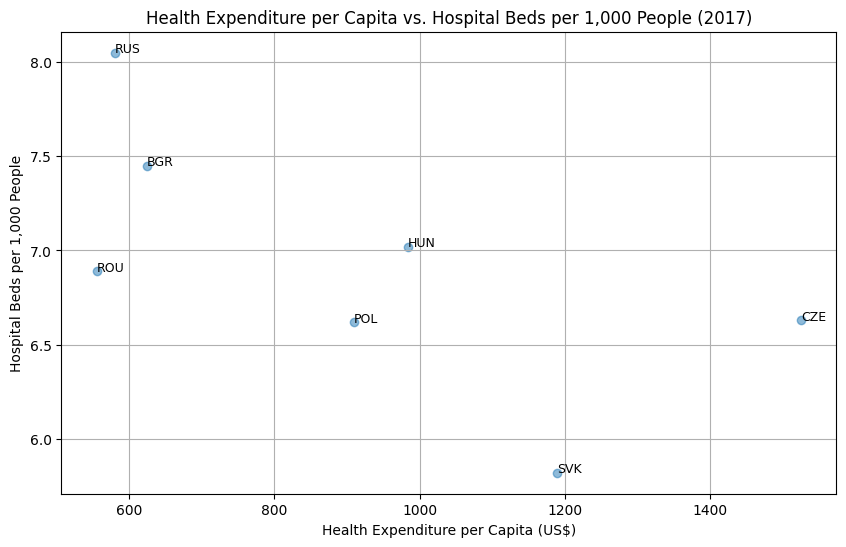

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert data to float and handle missing values
df_health_exp['value'] = pd.to_numeric(df_health_exp['value'], errors='coerce')
df_hospital_beds['value'] = pd.to_numeric(df_hospital_beds['value'], errors='coerce')

# Drop any NaN values that might disrupt plotting
df_health_exp = df_health_exp.dropna(subset=['value'])
df_hospital_beds = df_hospital_beds.dropna(subset=['value'])

# Filter data for a specific year, ensuring it is available in both datasets
year = '2017'
df_health_exp_2020 = df_health_exp[df_health_exp['date'] == year]
df_hospital_beds_2020 = df_hospital_beds[df_hospital_beds['date'] == year]

# Make sure both frames have the same set of countries
common_countries = set(df_health_exp_2020['countryiso3code']).intersection(set(df_hospital_beds_2020['countryiso3code']))
df_health_exp_2020 = df_health_exp_2020[df_health_exp_2020['countryiso3code'].isin(common_countries)]
df_hospital_beds_2020 = df_hospital_beds_2020[df_hospital_beds_2020['countryiso3code'].isin(common_countries)]

# Join data on country code for plotting
df_plot = pd.merge(df_health_exp_2020, df_hospital_beds_2020, on='countryiso3code', suffixes=('_health', '_beds'))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['value_health'], df_plot['value_beds'], alpha=0.5)
for idx, row in df_plot.iterrows():
    plt.text(row['value_health'], row['value_beds'], row['countryiso3code'], fontsize=9)

plt.title('Health Expenditure per Capita vs. Hospital Beds per 1,000 People (2017)')
plt.xlabel('Health Expenditure per Capita (US$)')
plt.ylabel('Hospital Beds per 1,000 People')
plt.grid(True)
plt.show()


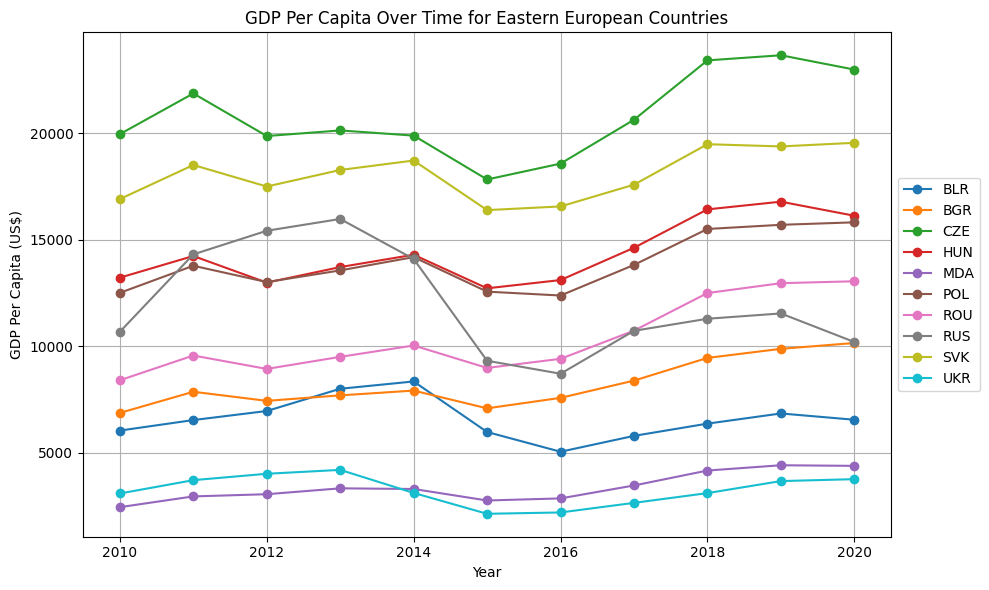

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'year' is a numerical type and sort the data
df_gdp_per_capita['year'] = pd.to_numeric(df_gdp_per_capita['year'], errors='coerce')
df_gdp_per_capita.sort_values(by='year', inplace=True)

# Create the line graph
plt.figure(figsize=(10, 6))
countries_to_plot = ['BLR', 'BGR', 'CZE', 'HUN', 'MDA', 'POL', 'ROU', 'RUS', 'SVK', 'UKR']  # List of Eastern European countries
for country in countries_to_plot:
    country_data = df_gdp_per_capita[df_gdp_per_capita['country'] == country]
    plt.plot(country_data['year'], country_data['gdp_per_capita'], marker='o', label=country)
plt.title('GDP Per Capita Over Time for Eastern European Countries')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (US$)')
plt.grid(True)

# Place the legend to the right of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()



In [ ]:
import requests

def fetch_eastern_european_countries():
    url = "http://api.worldbank.org/v2/country"
    params = {
        'format': 'json',
        'per_page': 300,  # Adjust depending on the limit of the API
        'region': 'ECS'  # Example region code for Europe & Central Asia, adjust as necessary
    }
    response = requests.get(url, params=params)
    data = response.json()

    # Assuming the response has a list of countries with their details in the second element
    countries = data[1]
    eastern_europe_countries = [country for country in countries if country['region']['value'] == 'Europe & Central Asia']

    return eastern_europe_countries

eastern_european_countries = fetch_eastern_european_countries()
for country in eastern_european_countries:
    print(country['id'], country['name'])


ALB Albania
AND Andorra
ARM Armenia
AUT Austria
AZE Azerbaijan
BEL Belgium
BGR Bulgaria
BIH Bosnia and Herzegovina
BLR Belarus
CHE Switzerland
CHI Channel Islands
CYP Cyprus
CZE Czechia
DEU Germany
DNK Denmark
ESP Spain
EST Estonia
FIN Finland
FRA France
FRO Faroe Islands
GBR United Kingdom
GEO Georgia
GIB Gibraltar
GRC Greece
GRL Greenland
HRV Croatia
HUN Hungary
IMN Isle of Man
IRL Ireland
ISL Iceland
ITA Italy
KAZ Kazakhstan
KGZ Kyrgyz Republic
LIE Liechtenstein
LTU Lithuania
LUX Luxembourg
LVA Latvia
MCO Monaco
MDA Moldova
MKD North Macedonia
MNE Montenegro
NLD Netherlands
NOR Norway
POL Poland
PRT Portugal
ROU Romania
RUS Russian Federation
SMR San Marino
SRB Serbia
SVK Slovak Republic
SVN Slovenia
SWE Sweden
TJK Tajikistan
TKM Turkmenistan
TUR Turkiye
UKR Ukraine
UZB Uzbekistan
XKX Kosovo
